In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [134]:
X,y=make_moons(n_samples=250, noise=0.5)

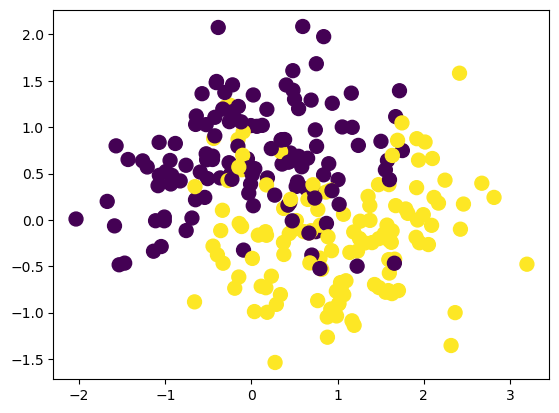

In [135]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [136]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(1) # shape [250,1]


In [137]:
dataset = TensorDataset(X_tensor,y_tensor)
dataloader = DataLoader(dataset,batch_size=32,shuffle=True)

In [138]:
class DeepReluNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(2, 10)
        self.fc2=nn.Linear(10,10)
        self.fc3=nn.Linear(10,10)
        self.fc4=nn.Linear(10,10)
        self.fc5=nn.Linear(10,10)
        self.fc6=nn.Linear(10,10)
        self.fc7=nn.Linear(10,10) 
        self.fc8=nn.Linear(10,10)
        self.fc4=nn.Linear(10,10)
        self.fc5=nn.Linear(10,10)
        self.output=nn.Linear(10,1)
        
        self.activation = nn.ReLU()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.activation(self.fc6(x))
        x = self.activation(self.fc7(x))
        x = self.activation(self.fc8(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = torch.sigmoid(self.output(x))  # Final output for binary classification
        return x
        

In [139]:
model = DeepReluNN()
loss_fun= nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [140]:
old_weight = model.fc1.weight.clone().detach()
old_weight

tensor([[ 0.4182, -0.5795],
        [ 0.6744,  0.6810],
        [ 0.5050, -0.4757],
        [ 0.6326, -0.1893],
        [ 0.1532,  0.2716],
        [-0.1271, -0.3006],
        [-0.5891, -0.5789],
        [ 0.6929,  0.4262],
        [ 0.1674,  0.4120],
        [ 0.1448,  0.2268]])

In [141]:
def compute_accuracy(preds, labels):
    preds = (preds > 0.5).float()
    correct = (preds == labels).sum().item()
    return correct/labels.size(0)

In [142]:
epochs=10
for epoch in range(epochs):
    total_loss = 0
    total_acc =0
    
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs =model(batch_X)
        loss = loss_fun(outputs, batch_y)
        loss.backward()
        print("Grad of fc1:", model.fc1.weight.grad.norm().item())
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += compute_accuracy(outputs, batch_y)
        
    avg_loss = total_loss/ len(dataloader)
    avg_acc = total_acc / len(dataloader)
    
    print(f"Epoch: {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Accuracy: {avg_acc:.4f}")
    
        

Grad of fc1: 4.779868322657421e-05
Grad of fc1: 3.651237420854159e-05
Grad of fc1: 6.198215123731643e-05
Grad of fc1: 4.149558662902564e-05
Grad of fc1: 3.95689312426839e-05
Grad of fc1: 5.2449649956543e-05
Grad of fc1: 3.440470391069539e-05
Grad of fc1: 4.992113827029243e-05
Epoch: 1/10 | Loss: 0.7022 | Accuracy: 0.4982
Grad of fc1: 4.483852535486221e-05
Grad of fc1: 3.542743797879666e-05
Grad of fc1: 2.9891609301557764e-05
Grad of fc1: 4.618205639417283e-05
Grad of fc1: 6.735591887263581e-05
Grad of fc1: 3.701487003127113e-05
Grad of fc1: 1.676838110142853e-05
Grad of fc1: 6.0820744693046436e-05
Epoch: 2/10 | Loss: 0.7008 | Accuracy: 0.4973
Grad of fc1: 3.654725878732279e-05
Grad of fc1: 3.848921551252715e-05
Grad of fc1: 4.7850942792138085e-05
Grad of fc1: 2.8094886147300713e-05
Grad of fc1: 5.122130096424371e-05
Grad of fc1: 2.31302128668176e-05
Grad of fc1: 5.092831634101458e-05
Grad of fc1: 3.789762195083313e-05
Epoch: 3/10 | Loss: 0.6989 | Accuracy: 0.5018
Grad of fc1: 5.0078964

In [143]:
new_weight = model.fc1.weight.clone().detach() 

In [144]:
new_weight

tensor([[ 0.4026, -0.5978],
        [ 0.7247,  0.6096],
        [ 0.5651, -0.5128],
        [ 0.6551, -0.1998],
        [ 0.2151,  0.1979],
        [-0.1691, -0.2624],
        [-0.6614, -0.5089],
        [ 0.6630,  0.4466],
        [ 0.1931,  0.4000],
        [ 0.0988,  0.2962]])

In [145]:
old_weight

tensor([[ 0.4182, -0.5795],
        [ 0.6744,  0.6810],
        [ 0.5050, -0.4757],
        [ 0.6326, -0.1893],
        [ 0.1532,  0.2716],
        [-0.1271, -0.3006],
        [-0.5891, -0.5789],
        [ 0.6929,  0.4262],
        [ 0.1674,  0.4120],
        [ 0.1448,  0.2268]])

In [146]:
# calculating new grads 

gradient_dl_dw = (old_weight - new_weight)/0.001
percent_change = abs(100*(old_weight - new_weight)/old_weight)

In [147]:
gradient_dl_dw

tensor([[ 15.5804,  18.3548],
        [-50.3421,  71.4107],
        [-60.0897,  37.1748],
        [-22.5065,  10.5194],
        [-61.8611,  73.7421],
        [ 42.0729, -38.1694],
        [ 72.3334, -70.0454],
        [ 29.8438, -20.3275],
        [-25.7288,  12.0497],
        [ 45.9455, -69.3908]])

In [148]:
percent_change

tensor([[ 3.7255,  3.1675],
        [ 7.4648, 10.4865],
        [11.8988,  7.8153],
        [ 3.5576,  5.5570],
        [40.3799, 27.1495],
        [33.1137, 12.6969],
        [12.2789, 12.0989],
        [ 4.3072,  4.7690],
        [15.3742,  2.9244],
        [31.7377, 30.5917]])

vgp result before reducing no of layers

In [ ]:
# gradient change =tensor([ 
#         [ 0.0448, -0.0476],
#         [-0.0000,  0.1796],
#         [ 0.4925, -0.0000],
#         [ 0.4935, -0.3706],
#         [-0.0005, -0.0000],
#         [ 0.6472, -0.4756],
#         [ 0.0927, -0.0695],
#         [ 0.1076, -0.0743],
#         [-0.6312,  0.5028],
#         [-0.3037,  0.2610]])

Results after reducing no. of layers 

In [150]:
# percent_change = tensor([
#         [  61.1749,   19.5349],
#         [1000.1516,   14.1364],
#         [  30.6946,   18.8138],
#         [  53.6735,   31.1321],
#         [  11.3543,   75.2933],
#         [  27.9173,    9.4952],
#         [  37.3605,  144.9224],
#         [  13.7372,   48.4270],
#         [  10.9983,   18.9258],
#         [  21.6259,  160.5358]])


# gradient = tensor([
#         [ 73.8398, -73.1962],
#         [ 69.4607, -69.7715],
#         [-90.7436,  90.4319],
#         [ 67.1418, -67.2083],
#         [ 72.8164, -74.4471],
#         [ 34.5214, -32.2869],
#         [-84.6676,  84.3552],
#         [-80.5159,  80.4206],
#         [ 76.4807, -78.5643],
#         [ 70.7073, -71.7952]])

results after using relu

In [ ]:
gradient = tensor([
        [ 15.5804,  18.3548],
        [-50.3421,  71.4107],
        [-60.0897,  37.1748],
        [-22.5065,  10.5194],
        [-61.8611,  73.7421],
        [ 42.0729, -38.1694],
        [ 72.3334, -70.0454],
        [ 29.8438, -20.3275],
        [-25.7288,  12.0497],
        [ 45.9455, -69.3908]])